<div align = "center">
<h1 style="font-family:Times New Roman">TURF ANALYSIS IN CHENNAI</h1>
</div>|

In [5]:

import pandas as pd
df = pd.read_csv("final_chennai_turf_data_with_years.csv")
df.head()

,Turf Name,Location,Landmark,Price Per Hour,Rating,Number of Reviews,Open Time,Close Time,Available on Weekend,Turf Type,Amenities,Contact Number,Latitude,Longitude,Maintenance Issues (days/month),Last-Minute Cancellations/week,Year,Users Per Year
0,"Gonzalez, Webster and Young Turf",Anna Nagar,Next to ABC Park,373,3.3,143,08:00,23:00,No,5‑a‑side,"Parking, Changing Room",-4965,13.056372,80.117304,3,8,2022,1360
1,Walker-Fox Turf,Velachery,Next to ABC Park,392,3.4,54,07:00,20:00,No,6‑a‑side,"Parking, Washroom",+1-242-952-9466x006,13.096300,80.116755,4,3,2022,4272
2,"Cervantes, Thomas and Mullins Turf",Velachery,Near XYZ Mall,714,3.6,26,08:00,23:00,Yes,5‑a‑side,"Washroom, Floodlights, Canteen, Parking",+1-503-448-9953x83947,13.155068,80.265400,2,9,2022,3592
3,Collins-Cruz Turf,OMR,Next to ABC Park,604,3.6,135,08:00,22:00,Yes,7‑a‑side,"Changing Room, Canteen",321-962-6539x9736,13.054562,80.161246,4,2,2022,966
4,"Howell, Harris and Dean Turf",Chromepet,Beside Metro Station,307,4.9,101,05:00,22:00,No,5‑a‑side,"Floodlights, Changing Room",845-730-6495x52163,13.073000,80.101482,4,8,2022,4926


In [6]:
df.shape

(2460, 18)

In [9]:
df.isnull().sum()

Turf Name                          0
Location                           0
Landmark                           0
Price Per Hour                     0
Rating                             0
Number of Reviews                  0
Open Time                          0
Close Time                         0
Available on Weekend               0
Turf Type                          0
Amenities                          0
Contact Number                     0
Latitude                           0
Longitude                          0
Maintenance Issues (days/month)    0
Last-Minute Cancellations/week     0
Year                               0
Users Per Year                     0
dtype: int64

<Axes: xlabel='Price Per Hour'>

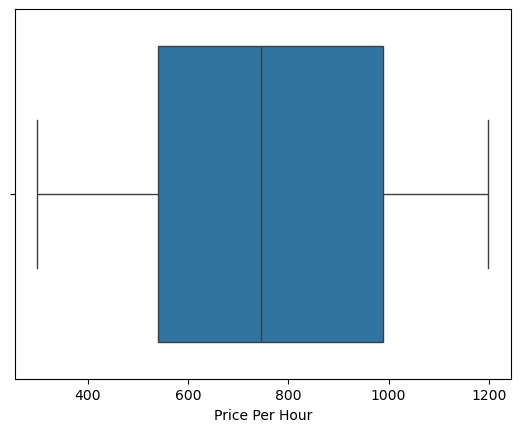

In [11]:
# OUTLIERS FOR PRICE PER HOUR

import seaborn as sns
sns.boxplot(x="Price Per Hour",data=df)

<Axes: xlabel='Price Per Hour', ylabel='Count'>

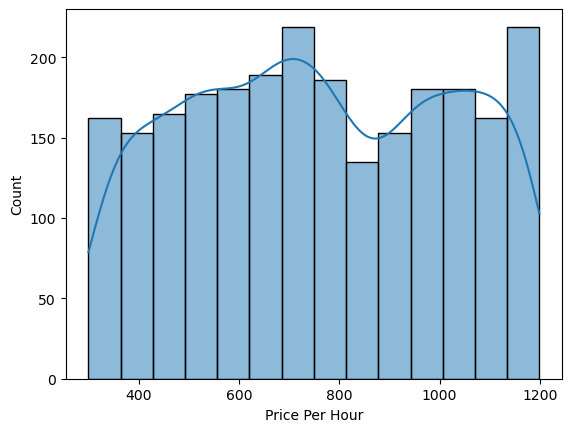

In [12]:

sns.histplot(x="Price Per Hour",data=df,kde=True)

<Axes: xlabel='Rating'>

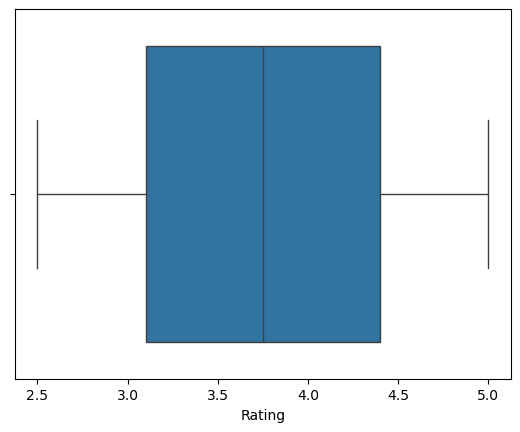

In [13]:
# OUTLIERS FOR RATING

sns.boxplot(x="Rating",data=df)

<Axes: xlabel='Number of Reviews'>

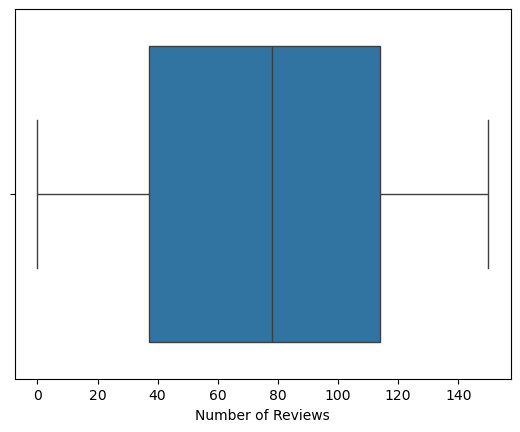

In [14]:
# OUTLIERS FOR Number of Reviews

sns.boxplot(x="Number of Reviews",data=df)

<Axes: xlabel='Open Time'>

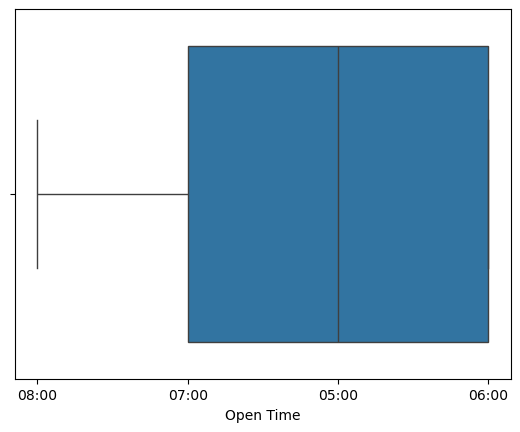

In [15]:
# OUTLIERS FOR Open Time

sns.boxplot(x="Open Time",data=df)

<Axes: xlabel='Open Time', ylabel='Count'>

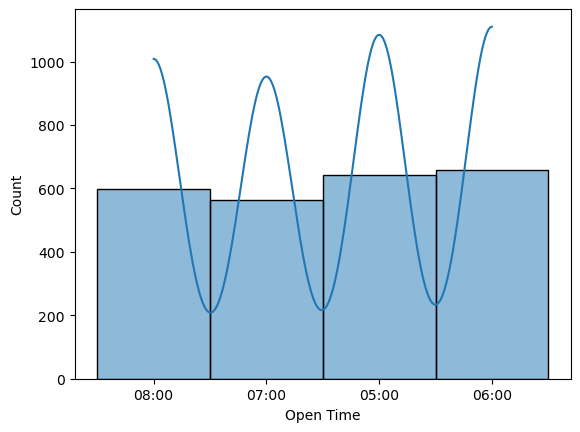

In [16]:
sns.histplot(x="Open Time",data=df,kde=True)

<Axes: xlabel='Close Time'>

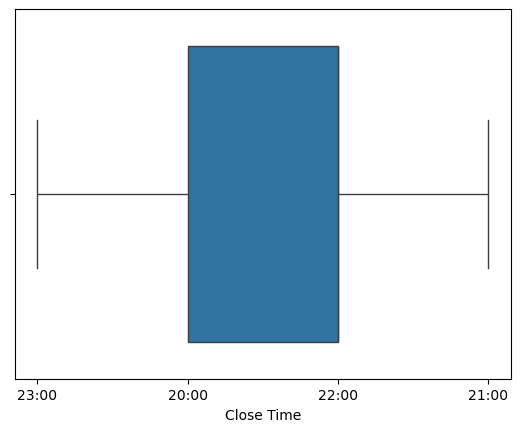

In [19]:
# OUTLIERS FOR Open Time

sns.boxplot(x="Close Time",data=df)

<Axes: xlabel='Maintenance Issues (days/month)'>

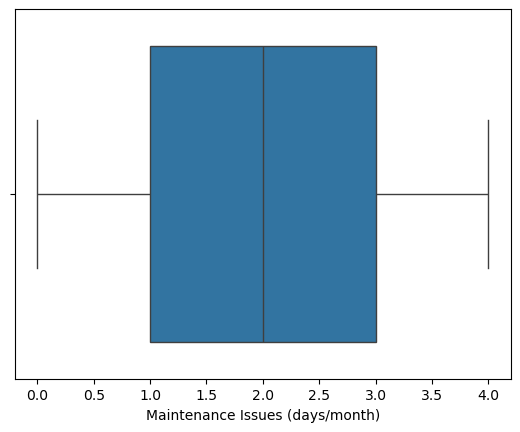

In [20]:
# OUTLIERS FOR Maintenance Issues (days/month)

sns.boxplot(x="Maintenance Issues (days/month)",data=df)

<Axes: xlabel='Last-Minute Cancellations/week'>

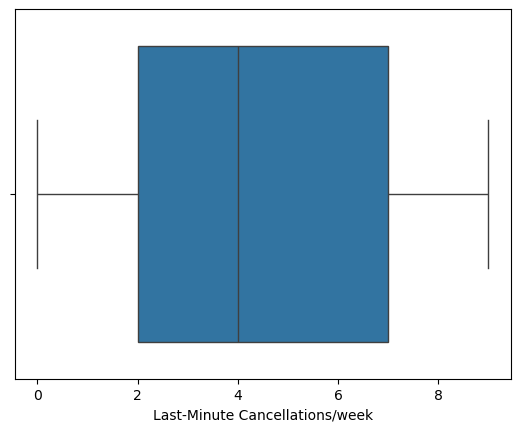

In [25]:
# OUTLIERS FOR Last-Minute Cancellations/week

sns.boxplot(x="Last-Minute Cancellations/week",data=df)

<Axes: xlabel='Latitude'>

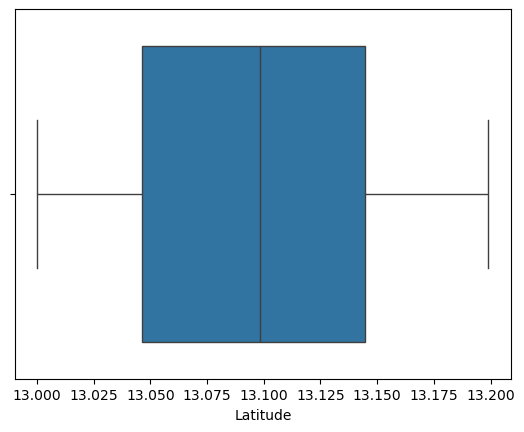

In [31]:
# OUTLIERS FOR Latitude

sns.boxplot(x="Latitude",data=df)

<Axes: xlabel='Longitude'>

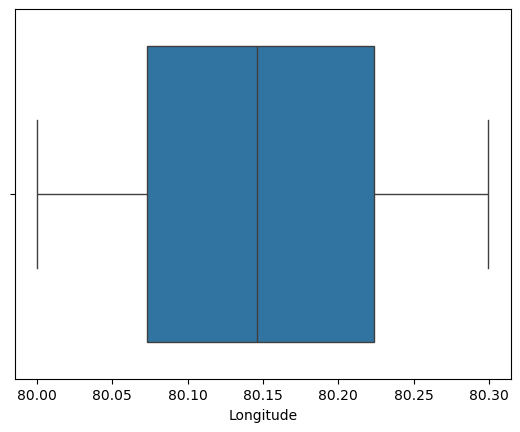

In [36]:
# OUTLIERS FOR Longitude

sns.boxplot(x="Longitude",data=df)

In [39]:
# OUTLIERS FOR YEAR

<Axes: xlabel='Year'>

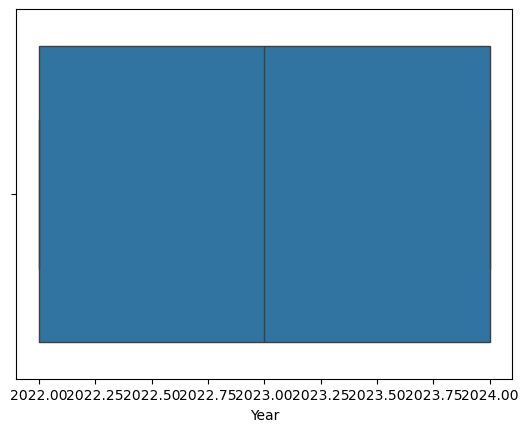

In [40]:
sns.boxplot(x="Year",data=df)

<Axes: xlabel='Users Per Year'>

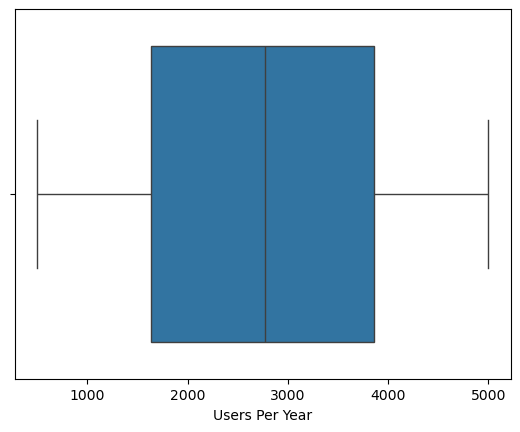

In [42]:
# OUTLIERS FOR Users Per Year

sns.boxplot(x="Users Per Year",data=df)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x1d7ef048740>,
 [Text(2022, 0, '2022'), Text(2023, 0, '2023'), Text(2024, 0, '2024')])

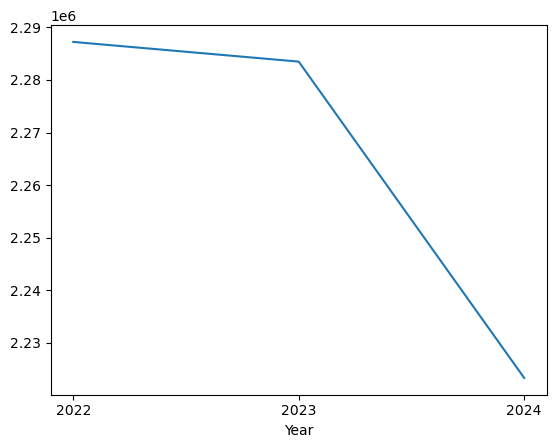

In [112]:
data = df.groupby("Year")["Users Per Year"].sum()
unique=data.index
data.plot(kind="line")
plt.xticks(unique)

Text(0.5, 1.0, 'Top 5 Turf Performance (2022–2024)')

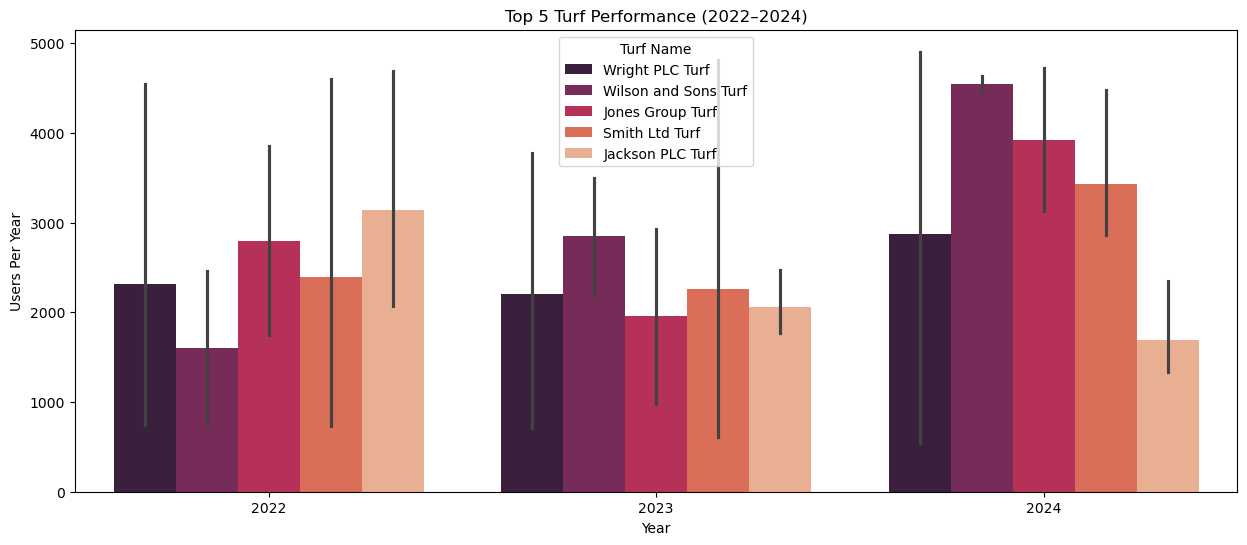

In [52]:
# Top 5 turfs by total users
top5 = df.groupby("Turf Name")["Users Per Year"].sum().nlargest(5).index

# Filter data
data = df[df["Turf Name"].isin(top5)]

# Plot
plt.figure(figsize=(15,6))
sns.barplot(data=data, x="Year", y="Users Per Year", hue="Turf Name", palette="rocket")
plt.title("Top 5 Turf Performance (2022–2024)")



Text(0, 0.5, 'Location')

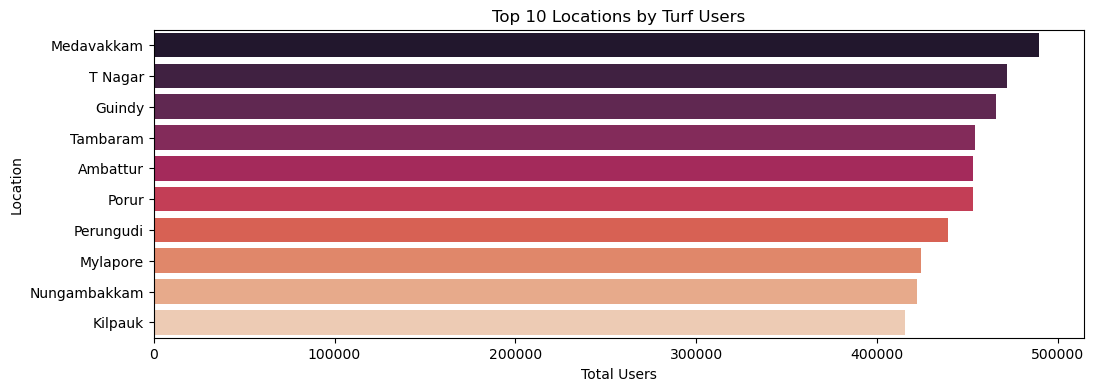

In [55]:
# Top 10 locations with most users
top_locations = df.groupby("Location")["Users Per Year"].sum().nlargest(10).reset_index()

# Bar chart
plt.figure(figsize=(12,4))
sns.barplot(x="Users Per Year", y="Location", data=top_locations, hue = "Location", palette="rocket")
plt.title("Top 10 Locations by Turf Users")
plt.xlabel("Total Users")
plt.ylabel("Location")

Text(0, 0.5, 'Turf Name')

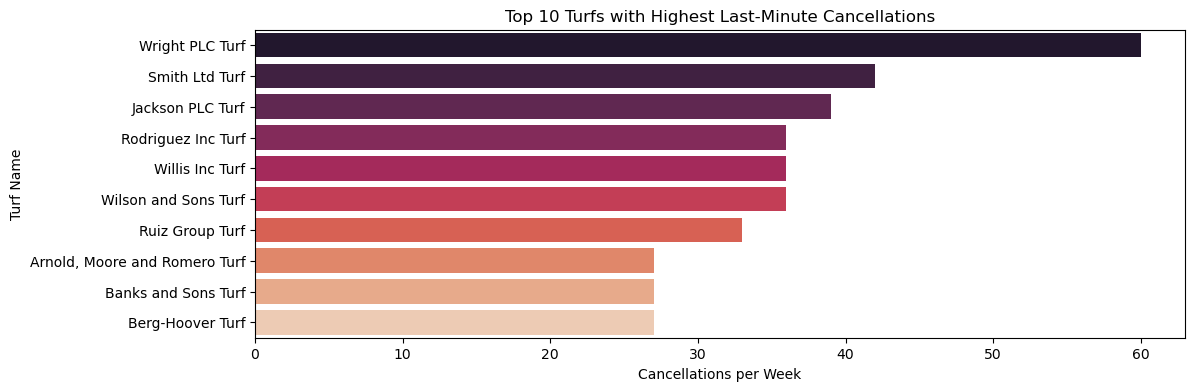

In [68]:
# Top 10 turfs with most cancellations
top = df.groupby("Turf Name")["Last-Minute Cancellations/week"].sum().nlargest(10).reset_index()

# Bar chart
plt.figure(figsize=(12,4))
sns.barplot(x="Last-Minute Cancellations/week", y="Turf Name", data=top, hue = "Turf Name", palette="rocket")
plt.title("Top 10 Turfs with Highest Last-Minute Cancellations")
plt.xlabel("Cancellations per Week")
plt.ylabel("Turf Name")

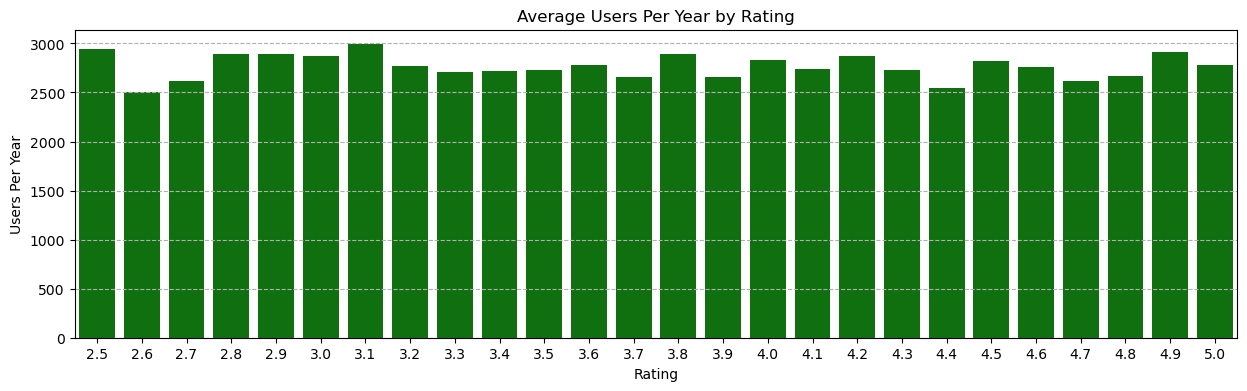

In [71]:
# Group by Rating and calculate average users
rating_data = df.groupby("Rating")["Users Per Year"].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(15,4))
sns.barplot(x="Rating", y="Users Per Year", data=rating_data, color="green")
plt.title("Average Users Per Year by Rating")
plt.grid(axis='y',linestyle="--")


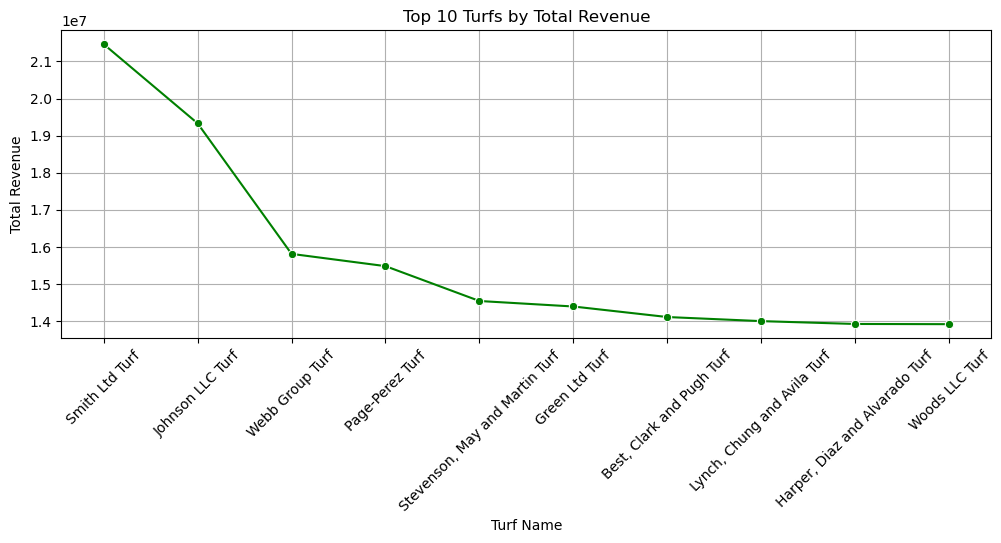

In [74]:
# Calculate revenue
df["Revenue"] = df["Price Per Hour"] * df["Users Per Year"]

# Total revenue per turf
total_revenue = df.groupby("Turf Name")["Revenue"].sum().reset_index()

# Get top 10 turfs by revenue
top10_revenue = total_revenue.sort_values(by="Revenue", ascending=False).head(10)

# Plot line chart
plt.figure(figsize=(12, 4))
sns.lineplot(data=top10_revenue, x="Turf Name", y="Revenue", marker='o', color="green")
plt.xticks(rotation=45)
plt.title("Top 10 Turfs by Total Revenue")
plt.xlabel("Turf Name")
plt.ylabel("Total Revenue")
plt.grid(True)



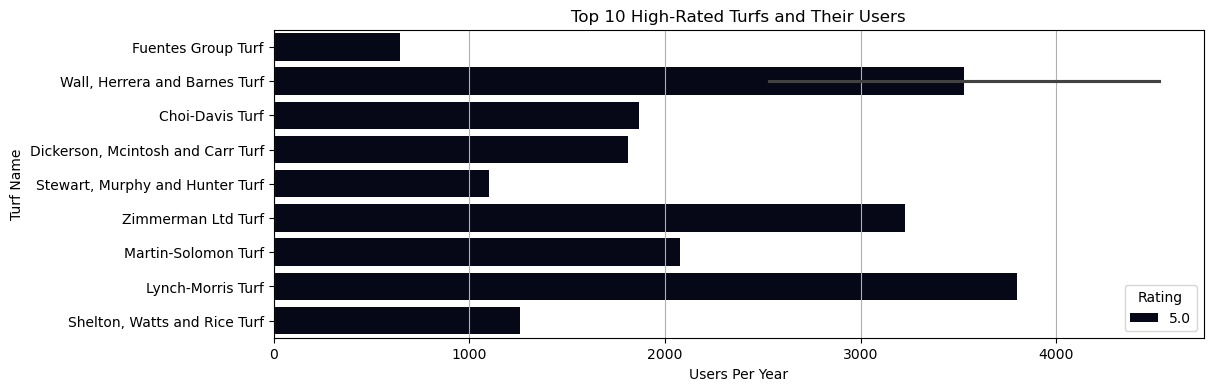

In [77]:
# Sort turfs by highest rating
high_rated = df.sort_values(by="Rating", ascending=False).head(10)

# Plot bar chart of High Rated Turfs vs Users
plt.figure(figsize=(12, 4))
sns.barplot(data=high_rated, x="Users Per Year", y="Turf Name",hue= "Rating", palette="rocket")
plt.title("Top 10 High-Rated Turfs and Their Users")
plt.xlabel("Users Per Year")
plt.ylabel("Turf Name")
plt.grid(axis='x')

Text(0.5, 1.0, 'Revenue Share by Top 5 Locations')

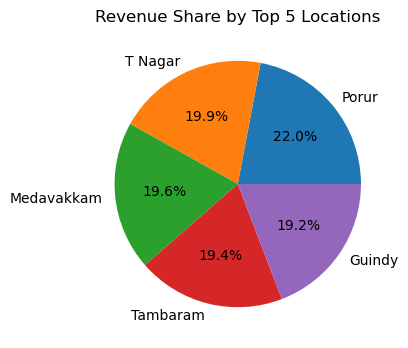

In [81]:
# Total revenue by location
location_revenue = df.groupby("Location")["Revenue"].sum().reset_index()

# Top 5 locations (for clarity in pie chart)
top5 = location_revenue.sort_values(by="Revenue", ascending=False).head(5)

# Plot pie chart
plt.figure(figsize=(12, 4))
plt.pie(top5["Revenue"], labels=top5["Location"], autopct='%1.1f%%')
plt.title("Revenue Share by Top 5 Locations")